<p style="text-align: center; font-size: 35px">به نام خدا</p>
<p style="text-align: center; font-size: 25px">هوش مصنوعی</p>
<p style="text-align: center; font-size: 25px">تمرین کامپیوتری شماره 3</p>
<p style="text-align: center; font-size: 25px">علی مهرانی</p>
<p style="text-align: center; font-size: 25px">شماره دانشجویی : 810198542</p>

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas
import time
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from collections import Counter
import cv2
import math

TESTSPLITRATIO = 0.3
ALPHA = 1

# Phase 1 - Data analysis

In [205]:
pkl_data_file = open('dataset/data.pkl', 'rb')
data = pickle.load(pkl_data_file)
print(len(data))

pkl_label_file = open('dataset/label.pkl', 'rb')
label = pickle.load(pkl_label_file)
print(len(label))

6000
6000


## train-test split

### q1
In this section we use sklearn library to split data to train and test.   
the split ratio is considered 0.3.   
according to many sources a good ratio to split train-test data should be 0.8/0.2 or 0.7/0.3 or values close.      

In [206]:
label_train, label_test, data_train, data_test = train_test_split(label, data, test_size=TESTSPLITRATIO)

### q2

Text(0.5, 0, 'image of digit 3')

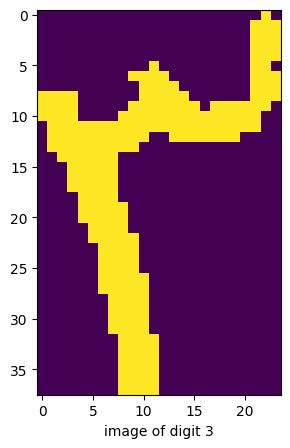

In [207]:
plt.figure(figsize=(10,5))
plt.imshow(data_train[100])
plt.xlabel('image of digit ' + str(label_train[100]))

### q3
In this section we use cv2 package to resize image.  
Then we change all non-0 values to 1 in the newly resized picture.   
The reason we resize pictures is that we can check and compare pixel values with train data directly in naive bayes without having to check image size and scaling.     

In [208]:
data_train_resized = []
data_test_resized = []

for i in data_train :
    row = cv2.resize(i, (20,20))
    #row[row>0]=1 #comment this line to avoid changing non-0 valus to 1
    data_train_resized.append(row)
    
for i in data_test :
    row = cv2.resize(i, (20,20))
    #row[row>0]=1 #comment this line to avoid changing non-0 valus to 1
    data_test_resized.append(row)

print(label_train[105])
print(data_train_resized[105])
print(label_test[100])
print(data_test_resized[100])

2
[[ 96 207 255 255 239 111  29   0   0   0   0   0   0   0   0   0  67  48
    0   0]
 [255 255 255 255 252 226  67   0   0   0   0   0   0   0   0   0 178 255
  188  32]
 [ 32 188 255 255 229  25   0   0   0   0   0   0   0   0   0   0 178 255
  255 255]
 [  0 178 255 255 255 255 188  80   0   0   0   0   0  48 169 245 255 255
  255 255]
 [  0 112 207 255 255 255 255 255 178   0   0  67 175 255 255 255 255 255
  178   0]
 [  0   0 127 255 255 255 255 255 255 255 255 255 255 255 255 255 233 112
    0   0]
 [  0   0  16  99 255 255 255 255 255 255 255 255 255 255 233  54  10   0
    0   0]
 [  0   0   0  76 255 255 255 255 255 239 111  29   0   0   0   0   0   0
    0   0]
 [  0   0   0  48 169 245 255 255 255 239 111  29   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  25 229 255 255 255 255 255  76   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  25 229 255 255 255 255 255  76   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  10  86 207 255 255 255 255  76   0   0   0  

### q4

0
[[  0   0   0   0   0   0   0   0   6 172 255 255 255 255 255 255 198  32
    0   0]
 [  0   0   0   0   0   0   0  38 106 205 255 255 255 255 255 255 220 121
   48   0]
 [  0   0   0   0   0   0   0  96 255 255 255 255 255 255 255 255 255 255
  121   0]
 [  0   0   0   0   0  12 111 191 255 255 255 255 255 255 255 255 255 255
  201 153]
 [  0   0   0   0  22  66 199 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [  0   0   0   0  87 208 241 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [  0   0  13  79 167 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [  0   0  32 198 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255]
 [  0   0  32 198 255 255 255 255 255 255 205 106 102 102 102 190 255 255
  255 255]
 [  0  24  76 209 255 255 255 255 254 220 138   5   0  14  47 168 255 255
  255 255]
 [  0  97 210 243 255 255 255 255 250 117  34   1   0  56 189 233 255 255
  255 255]
 [102 174 255 255 255 255 255 255 248  83  33  99 102 144 243 2

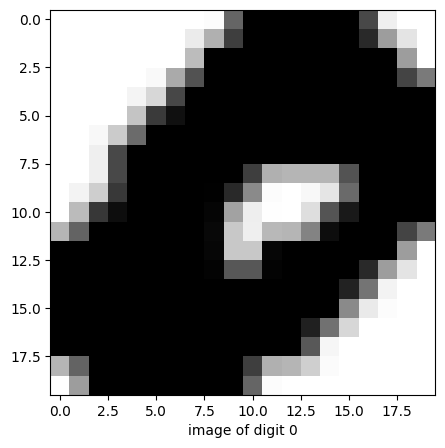

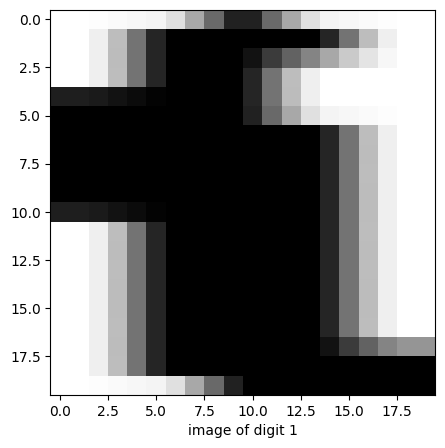

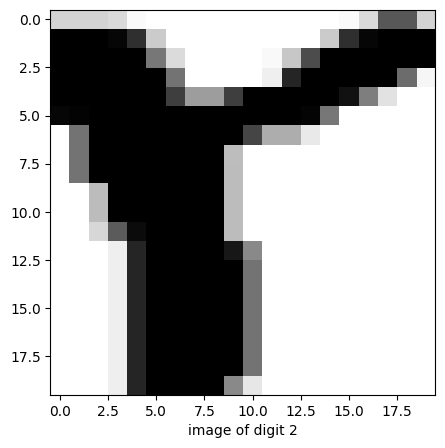

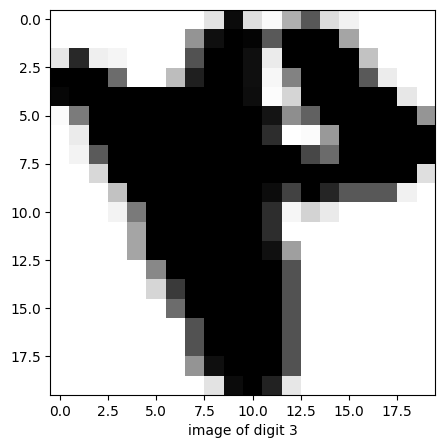

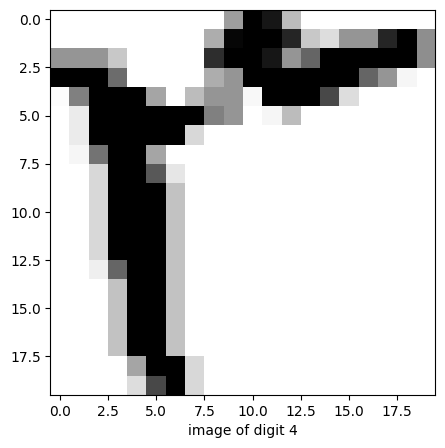

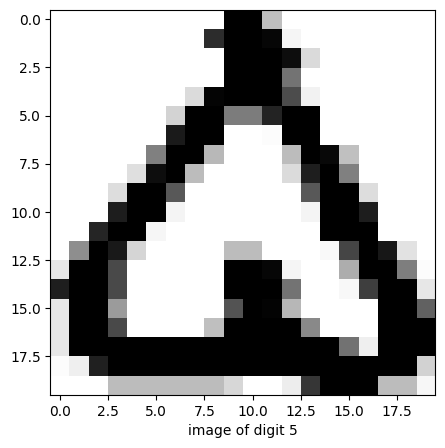

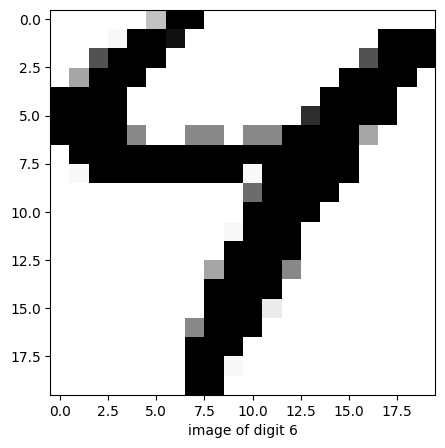

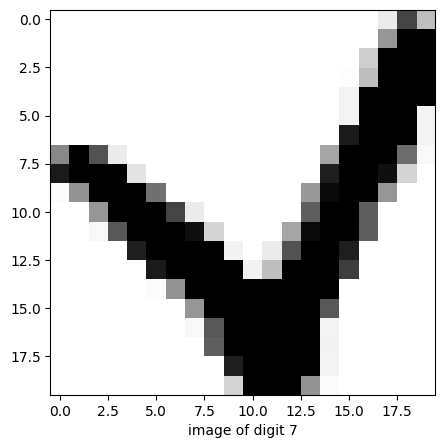

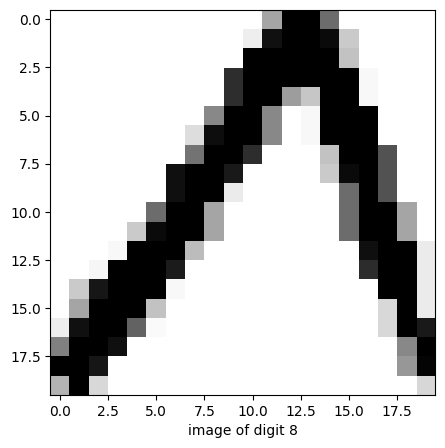

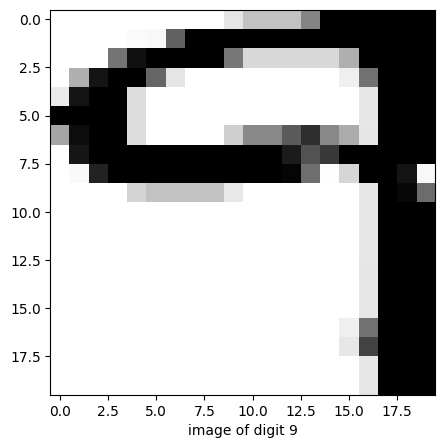

In [209]:
for i in range(0, 10) :
    print(i)
    print(data_train_resized[label_train.index(i)])

for i in range(0,10) :
#     plt.subplot(2,5, i+1)
    plt.figure(figsize=(10,5))
    plt.imshow(data_train_resized[label_train.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))
    

### q5

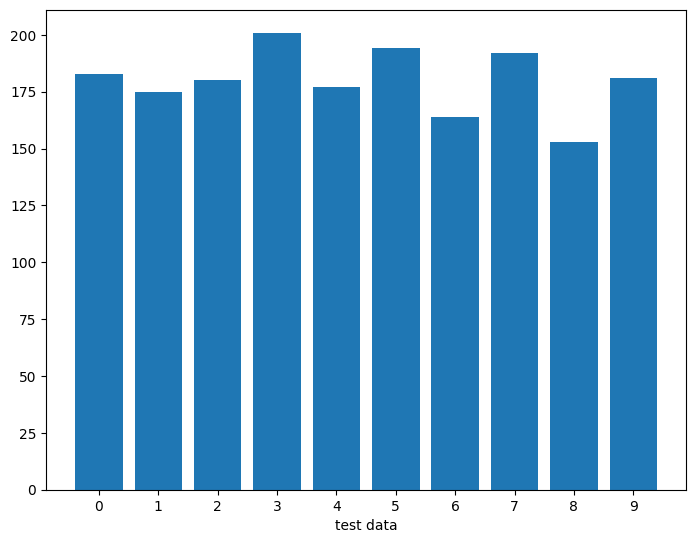

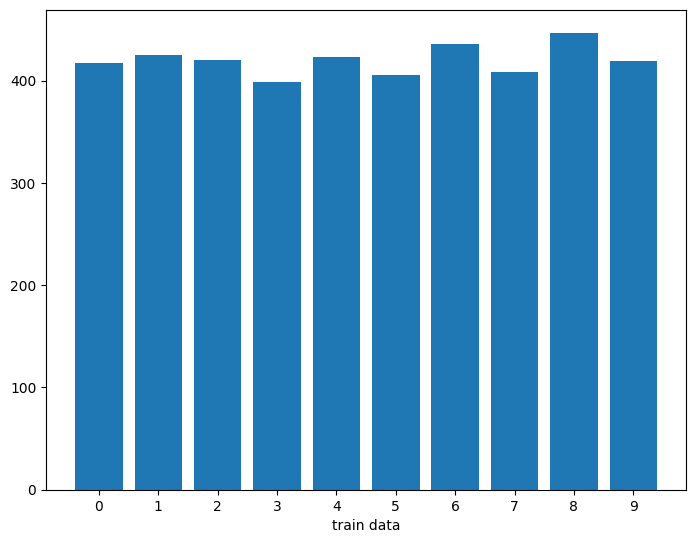

In [210]:
number_of_classes_test = [0 for x in range(10)]
number_of_classes_train = [0 for x in range(10)]

for x in label_train :
    if(x>=0 and x<=10) :
        number_of_classes_train[x] += 1
    else :
        print('error')

for x in label_test :
    if(x>=0 and x<=10) :
        number_of_classes_test[x] += 1
    else :
        print('error')
        

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['0','1','2','3','4','5','6','7','8','9']
ax.bar(classes, number_of_classes_test)
plt.xlabel('test data')
plt.show()

fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
classes = ['0','1','2','3','4','5','6','7','8','9']
ax.bar(classes, number_of_classes_train)
plt.xlabel('train data')
plt.show()

### q6   
In this section we use sklearn preprocessing methods to scale image values.   
The reason we do this is that if we dont scale values, in order to calculate probability, we must know the maximum and minimum value of a pixel and calculate probability baseed on that scale which might create issues. so we scale them to values ranging from 0 to 1. (The range must be normalized)    
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias because of different ranges.         

3
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.22352941
  0.83529412 0.50588235]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.49803922
  1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.22352941 0.         0.
  0.         0.         0.         0.         0.         0.49803922
  1.         0.77647059]
 [0.         0.         0.         0.         0.         0.
  0.         0.42352941 0.95686275 1.         0.91372549 0.10588235
  0.         0.         0.         0.         0.         0.49803922
  1.         1.        ]
 [1.         1.         1.         0.29803922 0.         0.
  0.         0.02352941 0.71372549 1.         1.         1.
  0.5254902  0.015

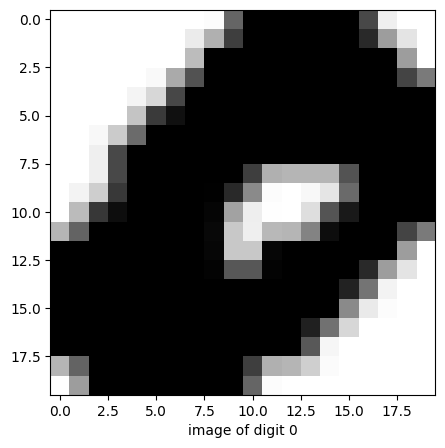

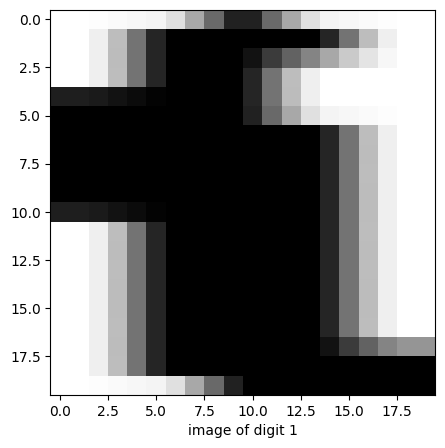

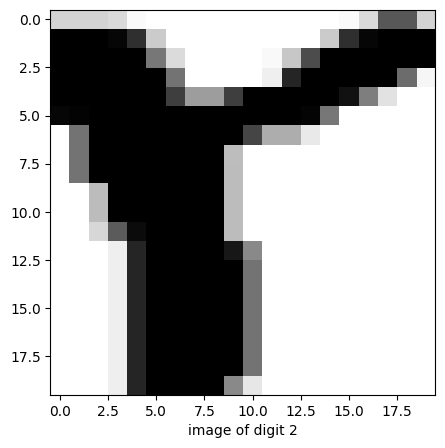

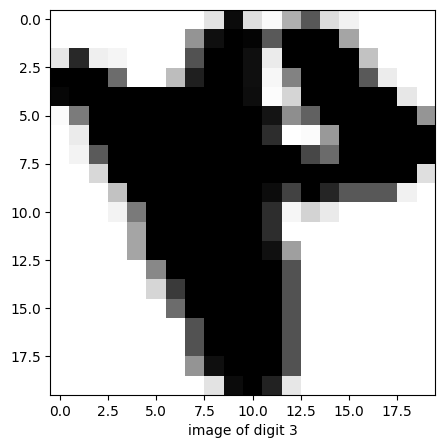

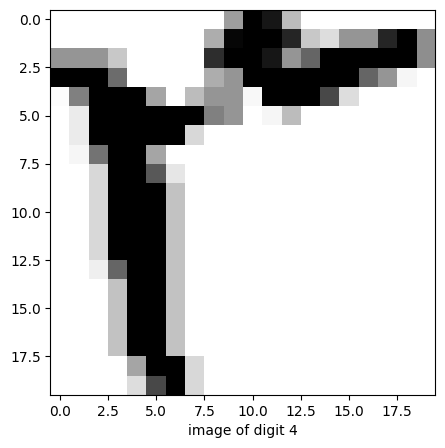

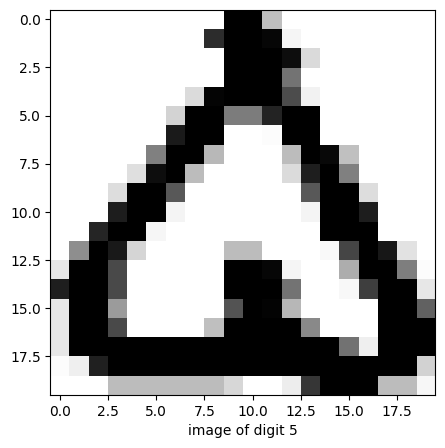

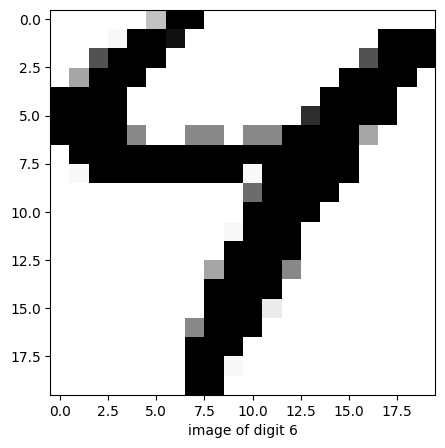

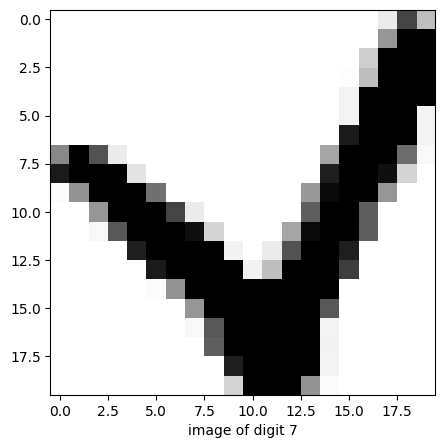

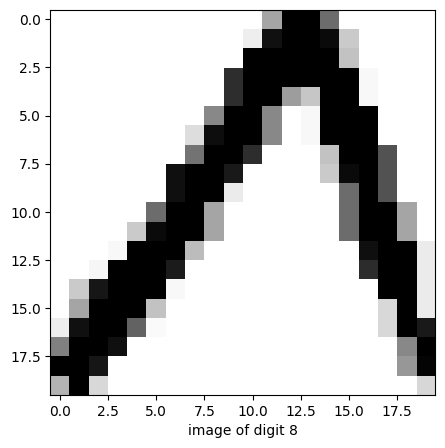

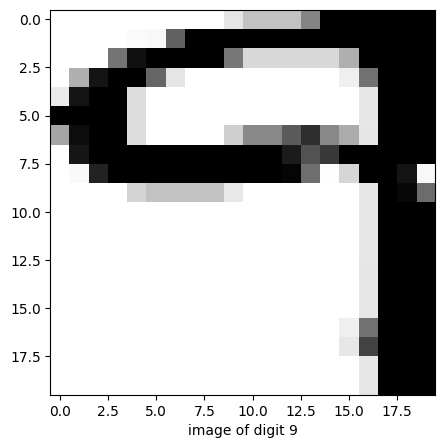

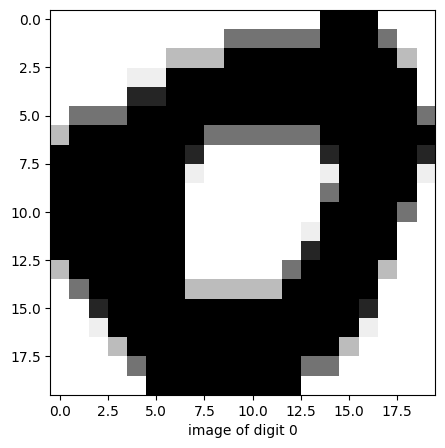

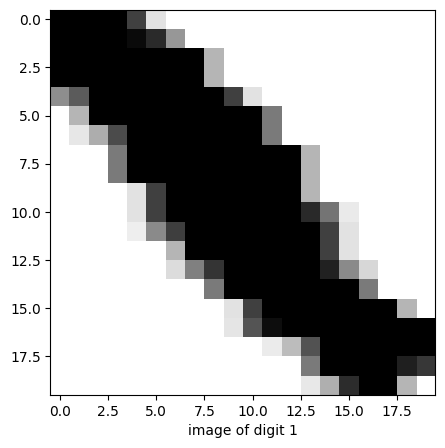

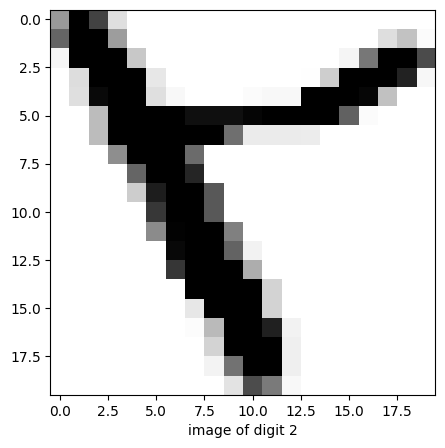

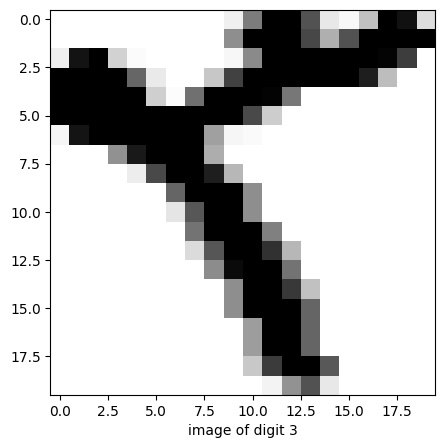

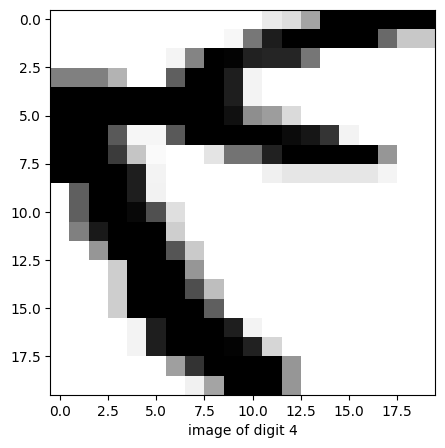

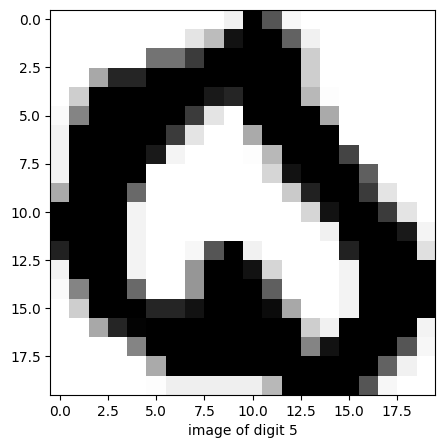

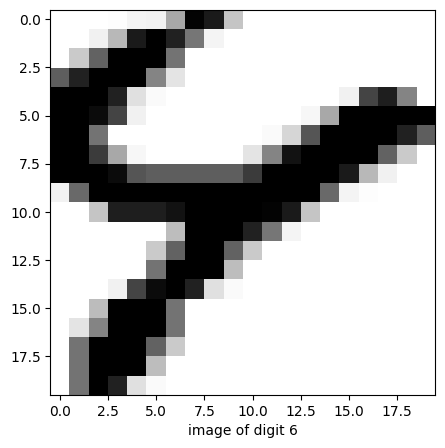

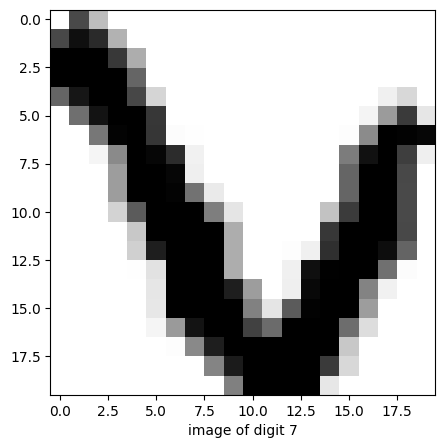

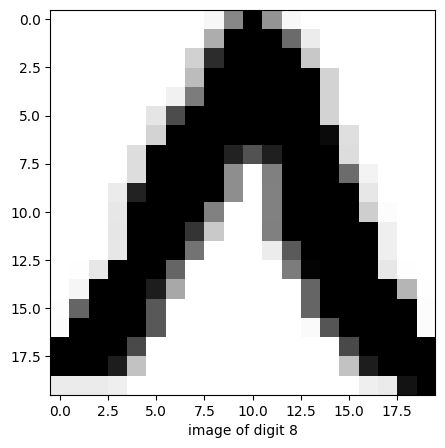

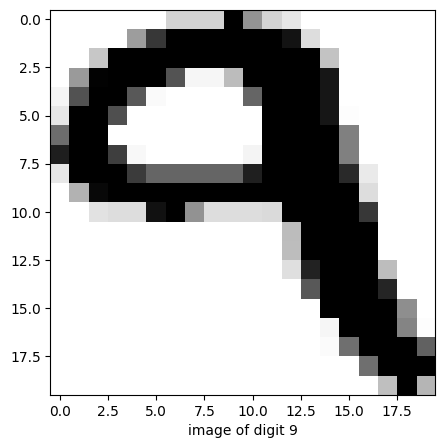

In [211]:
data_train_sc_rs = []
data_test_sc_rs = []
for data_tr in data_train_resized :
    data_tr = pre.MinMaxScaler().fit_transform(data_tr)
    data_train_sc_rs.append(data_tr)
for data_ts in data_test_resized :
    data_ts = pre.MinMaxScaler().fit_transform(data_ts)
    data_test_sc_rs.append(data_ts)
for i in range(0,10) :
    plt.figure(figsize=(10,5))
    plt.imshow(data_train_resized[label_train.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))

for i in range(0,10) :
    plt.figure(figsize=(10,5))
    plt.imshow(data_test_resized[label_test.index(i)], cmap="Greys")
    plt.xlabel('image of digit ' + str(i))
    
    
print(label_train[100])
print(data_train_sc_rs[100])
print(label_test[100])
print(data_test_sc_rs[100])

# Phase 2 - Problem procedure

### q7   

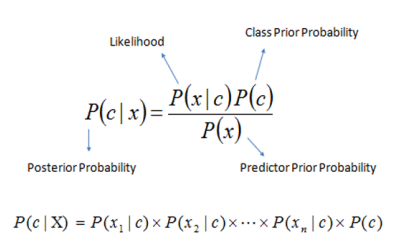


### In this example :

x: image seen
c: class number

#### Likelihood:    P(x|c)     
probability of having image in class number c(c => (number 1 to 10)) 

#### prior:   p(c)     
probability of an image data with class c in the dataset (around 0.1 in our case)

#### posterior:   p(c|x)   
probability of class number being c knowing that the image x is in that class


### Generally

#### Likelihood:    P(x|c)
It refers to the probability of observing the data that has been observed assuming that the data came from a specific scenario.        
For example you have symptoms of covid and you got positiive in test, likelihood refers to probability of observing the data to
check whether you really have covid or not. (Its calculation of likelihood in 2 scenarios which is that you have covid or not!)   
for example likelihood of observing a positive result in covid test given that you do not really have covid.   
#### prior:   
In the previous example(covid test), prior is the probability of (having) the disease before seeing(checking) any kind of test result.   
#### predictor:   
In the previous example predictor refers to thr probablity of getting (positive) test result.   
#### posterior:   
It refers to the probability of having disease knowing that you have positive test (or other scenarios).   


Another example would be the rain-predict problem in course slides which was :   
p(rain | predict) = p(predict|rain)p(rain)/p(predict)   
likelihood is probability of correct prediction when it rains (0.9 given in problem description).   
prior is general probability of raining.   
predictor is probability of correct prediction in all scenarios (raining or not raining).   
posterior is probability of raining knowing that it has been predicted!   


## Bernoulli Naive Bayes

To transform pictures to binary values we use cv2.threshold method and set the threshold value to 0.75 (pixel less than 0.75 => 0, else => 1)     

Text(0.5, 0, 'image of digit 3')

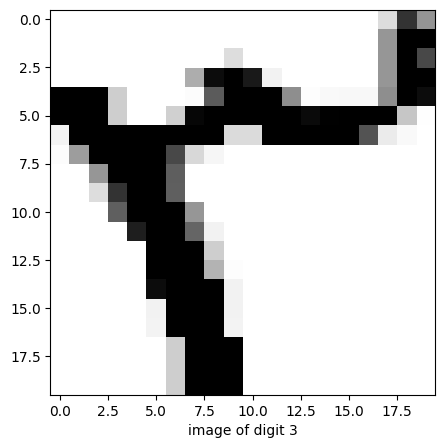

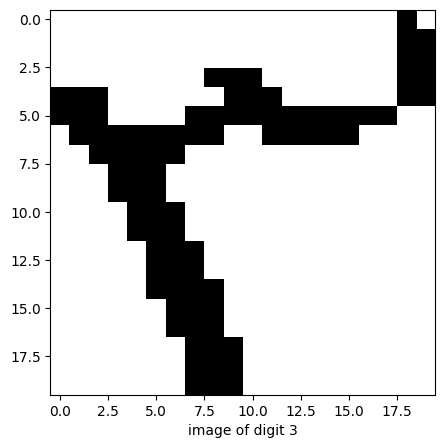

In [212]:
data_train_threshold = []
data_test_threshold = []
for train_item in data_train_sc_rs :
    ret, thresh = cv2.threshold(train_item, 0.75, 1, cv2.THRESH_BINARY)
    data_train_threshold.append(thresh)

for test_item in data_test_sc_rs :
    ret, thresh = cv2.threshold(test_item, 0.75, 1, cv2.THRESH_BINARY)
    data_test_threshold.append(thresh)

# ret, thresh1 = cv2.threshold(data_train_sc_rs[100], 0.75, 1, cv2.THRESH_BINARY)
# print(data_train_threshold[4199])

plt.figure(figsize=(10,5))
plt.imshow(data_train_sc_rs[100], cmap="Greys")
plt.xlabel('image of digit ' + str(label_train[100]))

plt.figure(figsize=(10,5))
plt.imshow(data_train_threshold[100], cmap="Greys")
plt.xlabel('image of digit ' + str(label_train[100]))

To calculate bernouli prob, we store the avg value of each pixel and sum of all pixels(all = 1) for each number in a dictionary.     
Then we these values to implement Bernoulli naive bayes.    

In [213]:
bernoulliProb = [dict() for x in range(10)]
for i in range(10) :
    bernoulliProb[i]["number"] = i
print(bernoulliProb)

[{'number': 0}, {'number': 1}, {'number': 2}, {'number': 3}, {'number': 4}, {'number': 5}, {'number': 6}, {'number': 7}, {'number': 8}, {'number': 9}]


Counter({8: 447, 6: 436, 1: 425, 4: 423, 2: 420, 9: 419, 0: 417, 7: 408, 5: 406, 3: 399})


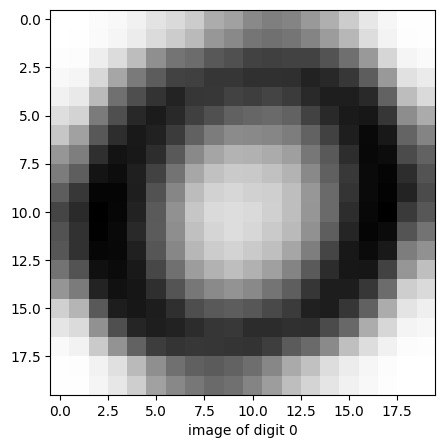

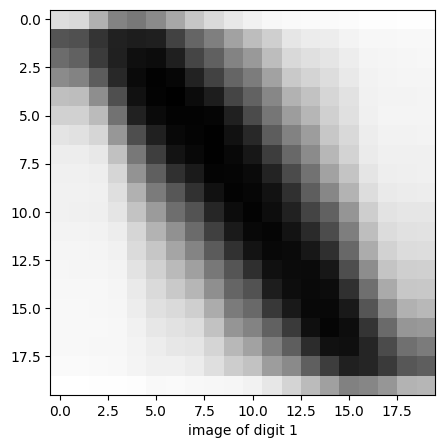

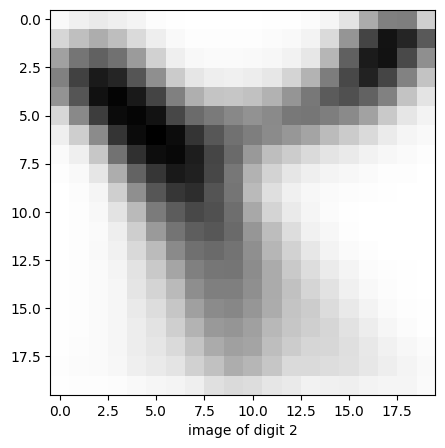

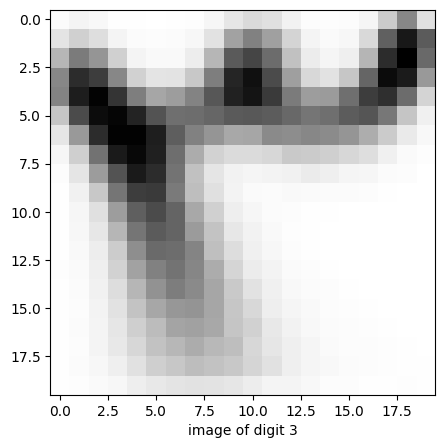

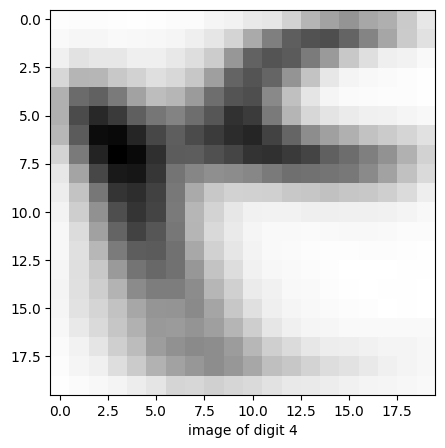

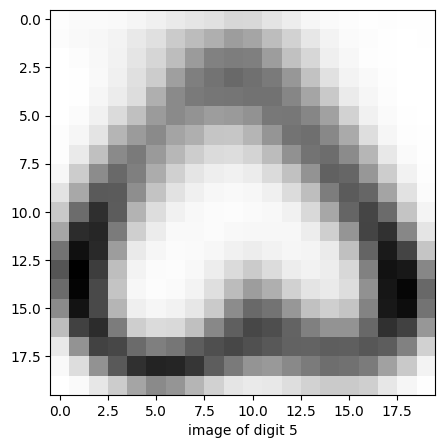

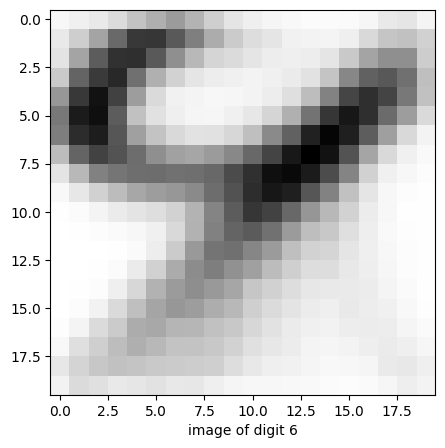

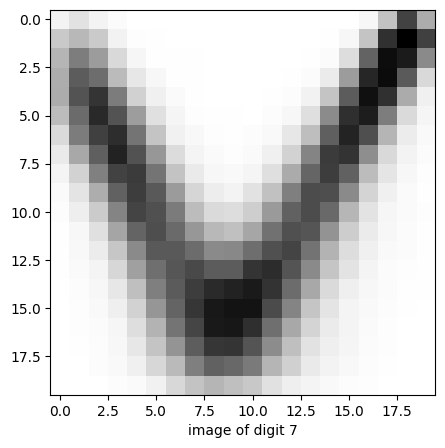

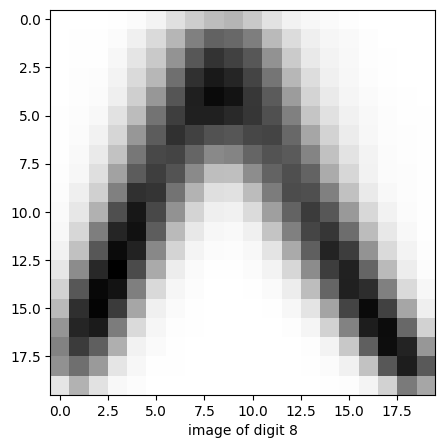

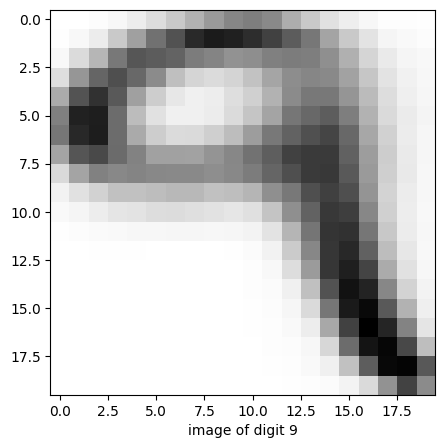

In [214]:
numberCnt = Counter(label_train)
print(numberCnt)

pixel_sum_0 = [ [0]*20 for i in range(20)]
pixel_full_0 = [ [numberCnt[0]]*20 for i in range(20)]

pixel_sum_1 = [ [0]*20 for i in range(20)]
pixel_full_1 = [ [numberCnt[1]]*20 for i in range(20)]

pixel_sum_2 = [ [0]*20 for i in range(20)]
pixel_full_2 = [ [numberCnt[2]]*20 for i in range(20)]

pixel_sum_3 = [ [0]*20 for i in range(20)]
pixel_full_3 = [ [numberCnt[3]]*20 for i in range(20)]

pixel_sum_4 = [ [0]*20 for i in range(20)]
pixel_full_4 = [ [numberCnt[4]]*20 for i in range(20)]

pixel_sum_5 = [ [0]*20 for i in range(20)]
pixel_full_5 = [ [numberCnt[5]]*20 for i in range(20)]

pixel_sum_6 = [ [0]*20 for i in range(20)]
pixel_full_6 = [ [numberCnt[6]]*20 for i in range(20)]

pixel_sum_7 = [ [0]*20 for i in range(20)]
pixel_full_7 = [ [numberCnt[7]]*20 for i in range(20)]

pixel_sum_8 = [ [0]*20 for i in range(20)]
pixel_full_8 = [ [numberCnt[8]]*20 for i in range(20)]

pixel_sum_9 = [ [0]*20 for i in range(20)]
pixel_full_9 = [ [numberCnt[9]]*20 for i in range(20)]

for i in range(len(data_train_threshold)) :
    
    if(label_train[i]==0) :
        x = np.array(data_train_threshold[i])
        pixel_sum_0 = np.add(pixel_sum_0, x)
        
    elif(label_train[i]==1) :
        x = np.array(data_train_threshold[i])
        pixel_sum_1 = np.add(pixel_sum_1, x)
    
    elif(label_train[i]==2) :
        x = np.array(data_train_threshold[i])
        pixel_sum_2 = np.add(pixel_sum_2, x)
    
    elif(label_train[i]==3) :
        x = np.array(data_train_threshold[i])
        pixel_sum_3 = np.add(pixel_sum_3, x)
    
    elif(label_train[i]==4) :
        x = np.array(data_train_threshold[i])
        pixel_sum_4 = np.add(pixel_sum_4, x)
    
    elif(label_train[i]==5) :
        x = np.array(data_train_threshold[i])
        pixel_sum_5 = np.add(pixel_sum_5, x)
    
    elif(label_train[i]==6) :
        x = np.array(data_train_threshold[i])
        pixel_sum_6 = np.add(pixel_sum_6, x)
    
    elif(label_train[i]==7) :
        x = np.array(data_train_threshold[i])
        pixel_sum_7 = np.add(pixel_sum_7, x)

    elif(label_train[i]==8) :
        x = np.array(data_train_threshold[i])
        pixel_sum_8 = np.add(pixel_sum_8, x)

    elif(label_train[i]==9) :
        x = np.array(data_train_threshold[i])
        pixel_sum_9 = np.add(pixel_sum_9, x)
    
    else :
        print('error!')
        
pixel_prob_0 = np.divide(pixel_sum_0, pixel_full_0)
pixel_prob_1 = np.divide(pixel_sum_1, pixel_full_1)
pixel_prob_2 = np.divide(pixel_sum_2, pixel_full_2)
pixel_prob_3 = np.divide(pixel_sum_3, pixel_full_3)
pixel_prob_4 = np.divide(pixel_sum_4, pixel_full_4)
pixel_prob_5 = np.divide(pixel_sum_5, pixel_full_5)
pixel_prob_6 = np.divide(pixel_sum_6, pixel_full_6)
pixel_prob_7 = np.divide(pixel_sum_7, pixel_full_7)
pixel_prob_8 = np.divide(pixel_sum_8, pixel_full_8)       
pixel_prob_9 = np.divide(pixel_sum_9, pixel_full_9)

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_0, cmap="Greys")
plt.xlabel('image of digit ' + str(0))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_1, cmap="Greys")
plt.xlabel('image of digit ' + str(1))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_2, cmap="Greys")
plt.xlabel('image of digit ' + str(2))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_3, cmap="Greys")
plt.xlabel('image of digit ' + str(3))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_4, cmap="Greys")
plt.xlabel('image of digit ' + str(4))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_5, cmap="Greys")
plt.xlabel('image of digit ' + str(5))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_6, cmap="Greys")
plt.xlabel('image of digit ' + str(6))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_7, cmap="Greys")
plt.xlabel('image of digit ' + str(7))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_8, cmap="Greys")
plt.xlabel('image of digit ' + str(8))

plt.figure(figsize=(10,5))
plt.imshow(pixel_prob_9, cmap="Greys")
plt.xlabel('image of digit ' + str(9))

bernoulliProb[0]["probability"] = pixel_prob_0
bernoulliProb[1]["probability"] = pixel_prob_1
bernoulliProb[2]["probability"] = pixel_prob_2
bernoulliProb[3]["probability"] = pixel_prob_3
bernoulliProb[4]["probability"] = pixel_prob_4
bernoulliProb[5]["probability"] = pixel_prob_5
bernoulliProb[6]["probability"] = pixel_prob_6
bernoulliProb[7]["probability"] = pixel_prob_7
bernoulliProb[8]["probability"] = pixel_prob_8
bernoulliProb[9]["probability"] = pixel_prob_9



In [215]:
def indices(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

Now we can write our BNB class which will execute Bernoulli Naive Bayes 

In [216]:
class BNB :
    def __init__(self, smoothing) :
        self.bernoulliSmoothData = [dict() for x in range(10)]
        self.smoothing = smoothing
        self.initialize_smooth_data()
        self.initialize_evaluation_dict()
        self.initialize_detected_wrong_dict()
        
    def initialize_evaluation_dict(self) :
        self.bernoulli_detection = [dict() for x in range(10)]
        for i in range(10) :
            self.bernoulli_detection[i]["detected"] = 0
            self.bernoulli_detection[i]["correct"] = 0
            self.bernoulli_detection[i]["recall"] = 0
    
    def initialize_detected_wrong_dict(self) :
        self.detected_wrong = [dict() for x in range(5)]
    
    def initialize_smooth_data(self) :
        for i in range(10) :
            self.bernoulliSmoothData[i]["number"] = i
            self.bernoulliSmoothData[i]["train_all_1_indices"] = []
            self.bernoulliSmoothData[i]["train_all_0_indices"] = []
            self.bernoulliSmoothData[i]["test_0_indices_num"] = []
            self.bernoulliSmoothData[i]["test_1_indices_num"] = []
        
        for number in range(10) :    
            for i in range(20):
                for j in range(20):
            
                    if(number==0) :
                        if(pixel_sum_0[i][j] == pixel_full_0[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_0[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
                    
                    elif(number==1) : 
                        if(pixel_sum_1[i][j] == pixel_full_1[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_1[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
            
                    elif(number==2) : 
                        if(pixel_sum_2[i][j] == pixel_full_2[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_2[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
            
                    elif(number==3) : 
                        if(pixel_sum_3[i][j] == pixel_full_3[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_3[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
                    
                    elif(number==4) : 
                        if(pixel_sum_4[i][j] == pixel_full_4[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_4[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
            
                    elif(number==5) : 
                        if(pixel_sum_5[i][j] == pixel_full_5[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_5[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
                        
                    elif(number==6) : 
                        if(pixel_sum_6[i][j] == pixel_full_6[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_6[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
                        
                    elif(number==7) : 
                        if(pixel_sum_7[i][j] == pixel_full_7[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_7[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
                        
                    elif(number==8) : 
                        if(pixel_sum_8[i][j] == pixel_full_8[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_8[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
                    
                    elif(number==9) : 
                        if(pixel_sum_9[i][j] == pixel_full_9[i][j]) :
                            self.bernoulliSmoothData[number]["train_all_1_indices"].append((i,j))
                        if(pixel_sum_9[i][j] == 0) :
                            self.bernoulliSmoothData[number]["train_all_0_indices"].append((i,j))
                    
                    else :
                        print('error')
                        
        self.setSmoothingData()
       
    def setSmoothingData(self) :
        for i in range(len(self.bernoulliSmoothData)) :
            for idx1 in self.bernoulliSmoothData[i]["train_all_1_indices"] :
                cnt = self.get_num_of_occurences_in_test(i, idx1, 0)
                self.bernoulliSmoothData[i]["test_0_indices_num"].append(cnt)
            for idx0 in self.bernoulliSmoothData[i]["train_all_0_indices"] :
                cnt = self.get_num_of_occurences_in_test(i, idx0, 1)
                self.bernoulliSmoothData[i]["test_1_indices_num"].append(cnt)

    def get_num_of_occurences_in_test(self, number, index, zero_or_one) :
        cnt=0
        for i in indices(label_test, number):
            if(data_test_threshold[i][index[0]][index[1]] == zero_or_one) :
                cnt += 1
        return cnt
    
    def bernoulli_NB(self, img, number_class):
        
        final_prob = 1;
        for i in range(20):
            for j in range(20):
                if(self.smoothing==False) :
                    final_prob *= (math.pow(bernoulliProb[number_class]['probability'][i][j], img[i][j])*math.pow((1-bernoulliProb[number_class]["probability"][i][j]), (1-img[i][j])))
                else :
                    assigned = False
                    if((i,j) in self.bernoulliSmoothData[number_class]["train_all_1_indices"]) :
                        num = self.bernoulliSmoothData[number_class]["test_0_indices_num"][self.bernoulliSmoothData[number_class]["train_all_1_indices"].index((i,j))]
                        if(num != 0 and img[i][j]==0) :
                            final_prob*=(num+ALPHA/(len(data_test_threshold) + (2*ALPHA)))
                            assigned = True
                            
                    elif((i,j) in bernoulliSmoothData[number_class]["train_all_0_indices"]) :
                        num = self.bernoulliSmoothData[number_class]["test_1_indices_num"][self.bernoulliSmoothData[number_class]["train_all_0_indices"].index((i,j))]
                        if(num != 0 and img[i][j]==1) :
                            final_prob*=(num+ALPHA/(len(data_test_threshold) + (2*ALPHA)))
                            assigned = True
            
                    if(assigned==False):
                        final_prob *= (math.pow(bernoulliProb[number_class]['probability'][i][j], img[i][j])*math.pow((1-bernoulliProb[number_class]["probability"][i][j]), (1-img[i][j])))
        
        return final_prob
    
    def predict_BNB(self, img):
        classes_prob = []
        for i in range(10):
            classes_prob.append(self.bernoulli_NB(img, i))
        return classes_prob.index(max(classes_prob))
        
    def apply_BNB(self):
#         self.setSmoothingData()
        avg,wrong = 0,0;
        for i in range(10) :
            total_run, correct_result, wrong_detected = 0,0,0
            x=indices(label_test, i)
            for idx in x:
                res = self.predict_BNB(data_test_threshold[idx])
                total_run += 1
                if(res==i):
                    correct_result+=1
                    self.bernoulli_detection[res]["correct"] += 1
                elif(res != i and (res<=9 and res>=0)):
                    wrong_detected += 1
                    if(wrong < 5) :
                        self.detected_wrong[wrong]["expected"] = i
                        self.detected_wrong[wrong]["img"] = data_test_sc_rs[idx]
                        self.detected_wrong[wrong]["observed"] = res
                        wrong += 1
                self.bernoulli_detection[res]["detected"] += 1
                
            recall = correct_result/total_run
            self.bernoulli_detection[i]["recall"] = recall  
            avg += correct_result/total_run
        
        self.get_evaluation_results()
        print('Total accuracy: ' + str(avg/10))

    def get_images_detected_wrong(self):
        for i in range(5): #assumed there are at least 5 images that are wrongly detected
            plt.figure(figsize=(10,5))
            plt.imshow(self.detected_wrong[i]["img"], cmap="Greys")
            plt.xlabel('expected value : ' + str(self.detected_wrong[i]["expected"]) + ' , actual observed value : ' + str(self.detected_wrong[i]["observed"]))

    def get_evaluation_results(self):
        F1_sum_macro, F1_weighted=0,0
        for i in range(10) :
            recall = self.bernoulli_detection[i]["recall"]
            print('evalulation results for number:', i)
            precision = 0 # if detection is 0, which probably will happen when there is no smoothing, set precision to 0 
            F1 = 0
            
            if(self.bernoulli_detection[i]["detected"] != 0) :
                precision = ((self.bernoulli_detection[i]["correct"] / self.bernoulli_detection[i]["detected"]))
            if((precision+recall) != 0) :
                F1 = 2*((precision * recall)/(precision + recall))    
            
            F1_weighted_coeff = (len(indices(label_test, i)) / len(label_test))
            F1_weighted += F1_weighted_coeff*F1
            F1_sum_macro += F1
            print('Recall:', recall)
            print('Precision:', precision)
            print('F1:', F1)
            print(' ')

        macro_F1 = F1_sum_macro/10
        print('Macro avg F1:', macro_F1)
        print('Weighted F1:', F1_weighted)

### smoothing

In [217]:
bernoulli_detection_s = [dict() for x in range(10)]
detected_wrong_s= [dict() for x in range(5)]
for i in range(10) :
    bernoulli_detection_s[i]["detected"] = 0
    bernoulli_detection_s[i]["correct"] = 0
    bernoulli_detection_s[i]["recall"] = 0

def get_num_of_occurences_in_test(number, index, zero_or_one) :
    cnt=0
    for i in indices(label_test, number):
        if(data_test_threshold[i][index[0]][index[1]] == zero_or_one) :
            cnt += 1
    return cnt
    
for i in range(len(bernoulliSmoothData)) :
    for idx1 in bernoulliSmoothData[i]["train_all_1_indices"] :
        cnt = get_num_of_occurences_in_test(i, idx1, 0)
        bernoulliSmoothData[i]["test_0_indices_num"].append(cnt)
    for idx0 in bernoulliSmoothData[i]["train_all_0_indices"] :
        cnt = get_num_of_occurences_in_test(i, idx0, 1)
        bernoulliSmoothData[i]["test_1_indices_num"].append(cnt)

# for item in bernoulliSmoothData :
#     print(item)
#     print("\n")
    
    
def bernoulli_NB_smooth(img, number_class):
    final_prob = 1;
    for i in range(20):
        for j in range(20):
            assigned = False
            
            if((i,j) in bernoulliSmoothData[number_class]["train_all_1_indices"]) :
                num = bernoulliSmoothData[number_class]["test_0_indices_num"][bernoulliSmoothData[number_class]["train_all_1_indices"].index((i,j))]
                if(num != 0 and img[i][j]==0) :
                    final_prob*=(num+ALPHA/(len(data_test_threshold) + (2*ALPHA)))
                    assigned = True
                    
            elif((i,j) in bernoulliSmoothData[number_class]["train_all_0_indices"]) :
                num = bernoulliSmoothData[number_class]["test_1_indices_num"][bernoulliSmoothData[number_class]["train_all_0_indices"].index((i,j))]
                if(num != 0 and img[i][j]==1) :
                    final_prob*=(num+ALPHA/(len(data_test_threshold) + (2*ALPHA)))
                    assigned = True
    
            if(assigned==False):
                final_prob *= (math.pow(bernoulliProb[number_class]['probability'][i][j], img[i][j])*math.pow((1-bernoulliProb[number_class]["probability"][i][j]), (1-img[i][j])))
    
    return final_prob

def predict_BNB_smooth(img):
    classes_prob = []
    for i in range(10):
        classes_prob.append(bernoulli_NB_smooth(img, i))
    return classes_prob.index(max(classes_prob))

def show_smooth_results_eval():
    F1_sum_macro, F1_weighted=0,0
    for i in range(10) :
        recall = bernoulli_detection_s[i]["recall"]
        print('evalulation results for number:', i)
        precision = 0 # if detection is 0, which probably will happen when there is no smoothing, set precision to 0 
        F1 = 0
        
        if(bernoulli_detection_s[i]["detected"] != 0) :
            precision = ((bernoulli_detection_s[i]["correct"] / bernoulli_detection_s[i]["detected"]))
        if((precision+recall) != 0) :
            F1 = 2*((precision * recall)/(precision + recall))    
        
        F1_weighted_coeff = (len(indices(label_test, i)) / len(label_test))
        F1_weighted += F1_weighted_coeff*F1
        F1_sum_macro += F1
        print('Recall:', recall)
        print('Precision:', precision)
        print('F1:', F1)
        print(' ')
        
    macro_F1 = F1_sum_macro/10
    print('Macro avg F1:', macro_F1)
    print('Weighted F1:', F1_weighted)


def get_BNB_prediction_accuracy_smooth():
    avg,wrong = 0,0;
    for i in range(10) :
        total_run, correct_result,wrong_detected = 0,0,0
        x=indices(label_test, i)
        for idx in x:
            res = predict_BNB_smooth(data_test_threshold[idx])
            total_run += 1
            if(res==i):
                correct_result+=1
                bernoulli_detection_s[res]["correct"] += 1
            elif(res != i and (res<=9 and res>=0)):
                wrong_detected += 1
                if(wrong < 5) :
                    detected_wrong_s[wrong]["expected"] = i
                    detected_wrong_s[wrong]["img"] = data_test_sc_rs[idx]
                    detected_wrong_s[wrong]["observed"] = res
                    wrong += 1
            bernoulli_detection_s[res]["detected"] += 1
        
        recall = correct_result/total_run
        bernoulli_detection_s[i]["recall"] = recall  
        avg += correct_result/total_run
#         show_smooth_results_eval()
#         print('Prediction accuracy for number ' + str(i) + ' is : ' + str(correct_result/total_run))
    show_smooth_results_eval()
    print('avg accuracy for all numbers : ' + str(avg/10))



## Gaussian Naive Bayes

In [218]:
class GNB :
    
    def __init__(self, smoothing) :
        self.smoothing = smoothing
        self.initialize_prob_dict()
        self.initialize_detected_wrong_dict()
        self.initialize_evaluation_dict()
        self.total_test_images = len(data_test_sc_rs)
        self.correct_detected_img = 0
        
    def initialize_prob_dict(self) :
        self.gaussian_prob = [dict() for x in range(10)]
        
        for i in range(10) :
            self.gaussian_prob[i]["number"] = i
            train_data_i = []
            for idx in indices(label_train, i):
                train_data_i.append(data_train_sc_rs[idx])
            self.gaussian_prob[i]["train_data"] = train_data_i

        for i in range(10) :
            train_data = np.array(self.gaussian_prob[i]["train_data"])    
            self.gaussian_prob[i]["train_data_var"] = train_data.var(axis=0)
            self.gaussian_prob[i]["train_data_avg"] = train_data.mean(axis=0)
        
    def initialize_evaluation_dict(self) :
        self.gaussian_detection = [dict() for x in range(10)]
        for i in range(10) :
            self.gaussian_detection[i]["detected"] = 0
            self.gaussian_detection[i]["correct"] = 0
            self.gaussian_detection[i]["recall"] = 0
    
    def initialize_detected_wrong_dict(self) :
        self.detected_wrong = [dict() for x in range(5)]
    
    def get_gaussian_probability(self, x, mu, sigma2): #mu=mean, sigma2=variance
        var = sigma2
        if(var==0 and self.smoothing):
            var = ((ALPHA)/(len(data_test_sc_rs) + (2*ALPHA)))
        a = (1/np.sqrt(2*(np.pi)*var))
        b = np.exp(-np.square(x-mu)/(2*var))
        return a*b
    
    def get_image_gaussian_probability(self, image, class_number):
        probability = 1
        for i in range(20):
            for j in range(20): 
                probability *= self.get_gaussian_probability(image[i][j], 
                                                        self.gaussian_prob[class_number]["train_data_avg"][i][j], 
                                                        self.gaussian_prob[class_number]["train_data_var"][i][j])
        return probability 
    
    def predict_gaussian(self, image):
        results = []
        for i in range(10) :
            results.append(self.get_image_gaussian_probability(image, i))
        return results.index(max(results))

    def gaussian_NB(self):
        avg = 0
        wrong=0
        
        self.initialize_detected_wrong_dict()
        for i in range(10) :
            total_run, correct_result, wrong_detected = 0,0,0
            x=indices(label_test, i)
            for idx in x:
                res = self.predict_gaussian(data_test_sc_rs[idx])
                total_run += 1
                if(res==i):
                    self.gaussian_detection[res]["correct"] += 1
                    correct_result+=1
                    self.correct_detected_img += 1
                elif(res !=i and (res <=9 or res >=0)) :
                    wrong_detected += 1
                    if(wrong < 5) :
                        self.detected_wrong[wrong]["expected"] = i
                        self.detected_wrong[wrong]["img"] = data_test_sc_rs[idx]
                        self.detected_wrong[wrong]["observed"] = res
                        wrong += 1
                self.gaussian_detection[res]["detected"] += 1
            
            avg += correct_result/total_run
            recall = correct_result/total_run
            self.gaussian_detection[i]["recall"] = recall
        
        self.get_evaluation_results()
        print("Total accuracy: " + str(avg/10))

    def get_images_detected_wrong(self):
        for i in range(5): #assumed there are at least 5 images that are wrongly detected
            plt.figure(figsize=(10,5))
            plt.imshow(self.detected_wrong[i]["img"], cmap="Greys")
            plt.xlabel('expected value : ' + str(self.detected_wrong[i]["expected"]) + ' , actual observed value : ' + str(self.detected_wrong[i]["observed"]))

    def get_evaluation_results(self):
        F1_sum_macro, F1_weighted=0,0
        for i in range(10) :
            recall = self.gaussian_detection[i]["recall"]
            print('evalulation results for number:', i)
            precision = 0 # if detection is 0, which probably will happen when there is no smoothing, set precision to 0 
            F1 = 0
            
            if(self.gaussian_detection[i]["detected"] != 0) :
                precision = ((self.gaussian_detection[i]["correct"] / self.gaussian_detection[i]["detected"]))
            if((precision+recall) != 0) :
                F1 = 2*((precision * recall)/(precision + recall))    
                
            F1_weighted_coeff = (len(indices(label_test, i)) / len(label_test))
            F1_weighted += F1_weighted_coeff*F1
            F1_sum_macro += F1
            
            print('Recall:', recall)
            print('Precision:', precision)
            print('F1:', F1)
            print(' ')
            
        macro_F1 = F1_sum_macro/10
        print('Macro avg F1:', macro_F1)
        print('Weighted F1:', F1_weighted)

## Additive Smoothing
### q8, q9

Additive Smoothing
For each number class, a specific pixel might have only one value (0 or 1 here) in all of the training data, for example for in all training data for number 0 the first pixel (index=>(0,0)) might be 0. In the example above, when the algorithm is checking test img, it might see that the first pixel is 1 and because all first pixels in train data were 1, p(Xi | c) would be 0 which will result in p(c|x) being 0 (according to naive bayes rule), and the number class wont be chosen at all. To solve this issue a constant value (pseudo-count) will be added to p(Xi|c) so that it wont be 0, this method is called additive smoothing (a.k.a Laplace smoothing)

#### in bernoulli naive bayes
In order to implement smoothing in bernoulli naive bayes we consider the pseudo count as :     
p(Xi | C) = S + ALPHA / N + (ALPHA * K)     
In which :     
S : number of Xi being 0 (or 1)      
N : total number of tests (len(test-data))      
K : Dimension of features = 2 (Dimension of image which is a 2d array)    
ALPHA : a coeff set to 1 here    

#### in gaussian naive bayes     
In order to implement smoothing in gaussian naive bayes we consider the pseudo count as :    
p(Xi | C) = ALPHA / N + (ALPHA * K)     
In which :    
N : total number of tests (len(test-data))    
K : Dimension of features = 2 (Dimension of image which is a 2d array)    
ALPHA : a coeff set to 1 here     

### executing bernoulli naive bayes without smoothing

In [219]:
bnb = BNB(False)
bnb.apply_BNB()

evalulation results for number: 0
Recall: 0.9508196721311475
Precision: 0.90625
F1: 0.9279999999999999
 
evalulation results for number: 1
Recall: 0.8914285714285715
Precision: 0.8478260869565217
F1: 0.8690807799442897
 
evalulation results for number: 2
Recall: 0.6944444444444444
Precision: 0.7621951219512195
F1: 0.7267441860465116
 
evalulation results for number: 3
Recall: 0.8258706467661692
Precision: 0.7942583732057417
F1: 0.8097560975609758
 
evalulation results for number: 4
Recall: 0.8361581920903954
Precision: 0.8457142857142858
F1: 0.8409090909090908
 
evalulation results for number: 5
Recall: 0.9278350515463918
Precision: 0.9326424870466321
F1: 0.9302325581395349
 
evalulation results for number: 6
Recall: 0.7987804878048781
Precision: 0.916083916083916
F1: 0.8534201954397395
 
evalulation results for number: 7
Recall: 0.953125
Precision: 0.9336734693877551
F1: 0.9432989690721649
 
evalulation results for number: 8
Recall: 0.9738562091503268
Precision: 0.9933333333333333
F1:

### executing bernoulli naive bayes with smoothing   


In [220]:
print('Applying Bernoulli Naive Bayes for test data with smoothing :')
get_BNB_prediction_accuracy_smooth()

Applying Bernoulli Naive Bayes for test data with smoothing :
evalulation results for number: 0
Recall: 0.9508196721311475
Precision: 0.90625
F1: 0.9279999999999999
 
evalulation results for number: 1
Recall: 0.8914285714285715
Precision: 0.8478260869565217
F1: 0.8690807799442897
 
evalulation results for number: 2
Recall: 0.6944444444444444
Precision: 0.7396449704142012
F1: 0.7163323782234957
 
evalulation results for number: 3
Recall: 0.8059701492537313
Precision: 0.7941176470588235
F1: 0.8
 
evalulation results for number: 4
Recall: 0.8305084745762712
Precision: 0.8497109826589595
F1: 0.84
 
evalulation results for number: 5
Recall: 0.9278350515463918
Precision: 0.9326424870466321
F1: 0.9302325581395349
 
evalulation results for number: 6
Recall: 0.8048780487804879
Precision: 0.9166666666666666
F1: 0.8571428571428571
 
evalulation results for number: 7
Recall: 0.9583333333333334
Precision: 0.934010152284264
F1: 0.9460154241645244
 
evalulation results for number: 8
Recall: 0.9738562

### executing gaussian naive bayes without smoothing

In [221]:
gnb = GNB(False)
gnb.gaussian_NB()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10180\921794077.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  a = (1/np.sqrt(2*(np.pi)*var))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10180\921794077.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  b = np.exp(-np.square(x-mu)/(2*var))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10180\921794077.py:42: RuntimeWarning: invalid value encountered in scalar multiply
  return a*b
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10180\921794077.py:41: RuntimeWarning: invalid value encountered in scalar divide
  b = np.exp(-np.square(x-mu)/(2*var))


evalulation results for number: 0
Recall: 0.9562841530054644
Precision: 0.8928571428571429
F1: 0.9234828496042217
 
evalulation results for number: 1
Recall: 0.9485714285714286
Precision: 0.31679389312977096
F1: 0.474964234620887
 
evalulation results for number: 2
Recall: 0.0
Precision: 0
F1: 0
 
evalulation results for number: 3
Recall: 0.0
Precision: 0
F1: 0
 
evalulation results for number: 4
Recall: 0.96045197740113
Precision: 0.23319615912208505
F1: 0.3752759381898455
 
evalulation results for number: 5
Recall: 0.9123711340206185
Precision: 0.5042735042735043
F1: 0.6495412844036698
 
evalulation results for number: 6
Recall: 0.0
Precision: 0
F1: 0
 
evalulation results for number: 7
Recall: 0.0
Precision: 0
F1: 0
 
evalulation results for number: 8
Recall: 0.0
Precision: 0
F1: 0
 
evalulation results for number: 9
Recall: 0.0
Precision: 0
F1: 0
 
Macro avg F1: 0.24232643068186238
Weighted F1: 0.246972751538968
Total accuracy: 0.37776786929986417


As expected value of variance for some features in classes becomes 0 and we get divide by zero error during our calculation.   
To solve this issue we set smoothing flag to true.

### executing gaussian naive bayes with smoothing

In [222]:
gnb_s = GNB(True)
gnb_s.gaussian_NB()

evalulation results for number: 0
Recall: 0.9562841530054644
Precision: 0.9114583333333334
F1: 0.9333333333333332
 
evalulation results for number: 1
Recall: 0.8457142857142858
Precision: 0.8409090909090909
F1: 0.8433048433048433
 
evalulation results for number: 2
Recall: 0.6055555555555555
Precision: 0.7517241379310344
F1: 0.6707692307692307
 
evalulation results for number: 3
Recall: 0.9054726368159204
Precision: 0.6618181818181819
F1: 0.7647058823529412
 
evalulation results for number: 4
Recall: 0.6949152542372882
Precision: 0.8848920863309353
F1: 0.7784810126582279
 
evalulation results for number: 5
Recall: 0.9072164948453608
Precision: 0.9312169312169312
F1: 0.9190600522193212
 
evalulation results for number: 6
Recall: 0.7804878048780488
Precision: 0.927536231884058
F1: 0.8476821192052981
 
evalulation results for number: 7
Recall: 0.9739583333333334
Precision: 0.9211822660098522
F1: 0.9468354430379746
 
evalulation results for number: 8
Recall: 0.9607843137254902
Precision: 0

# Phase3 - Evaluation

### q10

#### Precision :    
TP: True Positive     
FP: False Positive     
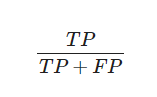
Precision is a kind of measurement for a classifier's exactness. A low value means there are a large number of False Positives.


#### Recall :   
FN : False Negative    
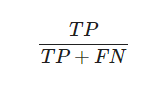
Recall is a kind of measurement for classifier's completeness, A low value means there are a large number of False negatives.


For example in class 3 (in gnb_s) there is a big difference between recall and precision which means that classifier has detected real 3 digits as 3 with good score (good recall) but on the other hand it has detected lots of non-3 digits as 3 (high false positives => low precision)    
The difference between these 2 can be understanded with an example, suppose our digit classifier identifies digits in test data that are labeled as 3, with a high ratio, but it also detects many other numbers as 3! so its recall and precision are very different with each other right now, in order to measure how good a classifier is we need both of these identifiers.



### q11

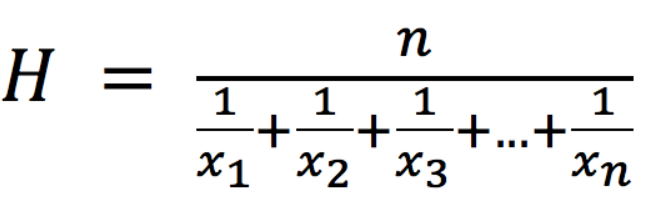
 
رابطه بالا میانگین هارمونیک نام دارد که در این جا داریم
N = 2   
x1 = precision    
x2 = recall

میانگین هارمونیک که از رابطه شکل بالا محاسبه میشود، معمولاً هنگامی کاربرد دارد که محاسبه میانگین نرخ ها اهمیت داشته باشد  
در موارد خاص که فقط دو عدد وجود دارد، میانگین هارمونیک را می‌توان از رابطه معیار اف-۱ به دست آورد. میتوان ثابت کرد که میانگین هارمونیک همیشه کمتر یا مساوی میانگین حسابی است. همچنین، از این میانگین تنها برای اعداد مثبت استفاده میشود  
دلیل برتری این نوع میانگین نسبت به میانگین حسابی را در یک مثال بررسی خواهیم کرد    
فرض میکنیم که برنامه برای یک کلاس مقدار حدود 0 را برای پرسیشن و حدود 1 برای ریکال میدهد.
اگر از روش معمولی میانگین یا همان میانگین حسابی استفاده کنیم مقدار اف-1 حدود 0.5 می شود   
اما اگر از روش هارمونیک استفاده کنیم مقدار آن حدودا 0 بدست می آید    
واضح است که مقدار 0 اینجا بهتر و منطقی تر است زیرا اگر مقدار پرسیشن حدود 0 باشد الگوریتم ایراد جدی دارد و برنامه اشتباه عمل می کند    
به طور کلی میتوان گفت روش هارمونیک مقدار متعادل تری را برای خروجی به ما میدهد


### q12    
#### Macro avg (F1) : 
normal average of F1 values of classes   
#### Micro avg (F1) :    
equal to accuray value (correct detected / total)
#### Weighted avg (F1) :     
weighted average of F1 values in which the weight of each class is the ratio of number of that class samples to total samples (in the testing data)   
وزن هر اف-1 برابر تعداد نمونه های ان کلاس در داده های تست به تعداد کل داده های تست است   


### q13   

#### Gaussian Naive Bayes (without smoothing)     

| Attempt       | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | All classes |
| :-----        | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:       |
| Recall        | 95%   | 94%   | 0%    | 0%    | 96%   | 283   | 0%    | 0%    | 0%    | 0%    |-            |
| Precision     | 89%   | 31%   | 0%    | 0%    | 23%   | 283   | 0%    | 0%    | 0%    | 0%    |-            |
| F1-score      | 92%   | 47%   | 0%    | 0%    | 37%   | 283   | 0%    | 0%    | 0%    | 0%    |-            |
| Accuracy      | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |37%          |
| Macro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |24%          |
| Micro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |37%          |
| Weighted Avg  | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |24%          |


#### Gaussian Naive Bayes (with smoothing)     

| Attempt       | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | All classes |
| :-----        | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:       |
| Recall        | 95%   | 84%   | 60%   | 90%   | 69%   | 90%   | 78%   | 97%   | 96%   | 93%   |-            |
| Precision     | 91%   | 84%   | 75%   | 66%   | 88%   | 93%   | 92%   | 92%   | 98%   | 87%   |-            |
| F1-score      | 93%   | 84%   | 67%   | 76%   | 77%   | 92%   | 84%   | 94%   | 97%   | 90%   |-            |
| Accuracy      | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |85.7%        |
| Macro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |85%          |
| Micro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |85.7%        |
| Weighted Avg  | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |85%          |


#### Bernoulli Naive Bayes  (without smoothing)       

| Attempt       | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | All classes |
| :-----        | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:       |
| Recall        | 95%   | 89%   | 69%   | 82%   | 83%   | 92%   | 79%   | 95%   | 97%   | 93%   |-            |
| Precision     | 90%   | 84%   | 76%   | 79%   | 84%   | 93%   | 91%   | 93%   | 99%   | 87%   |-            |
| F1-score      | 92%   | 86%   | 72%   | 80%   | 84%   | 93%   | 85%   | 94%   | 98%   | 90%   |-            |
| Accuracy      | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87.8%        |
| Macro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87%          |
| Micro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87.8%          |
| Weighted Avg  | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87%          |


#### Bernoulli Naive Bayes  (with smoothing)      

| Attempt       | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | All classes |
| :-----        | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:       |
| Recall        | 95%   | 89%   | 69%   | 80%   | 83%   | 92%   | 80%   | 95%   | 97%   | 93%   |-            |
| Precision     | 90%   | 84%   | 73%   | 79%   | 84%   | 93%   | 91%   | 93%   | 99%   | 87%   |-            |
| F1-score      | 92%   | 86%   | 71%   | 80%   | 84%   | 93%   | 85%   | 94%   | 98%   | 90%   |-            |
| Accuracy      | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87.8%        |
| Macro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87%          |
| Micro Avg     | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87.8%        |
| Weighted Avg  | -     | -     | -     | -     | -     | -     | -     | -     | -     | -     |87%          |


### q14    
It can be observerd that after using smoothing in GNB, our accuracy and evaluation parameters, increased significantly.
However in BNB they didnt change so much.   
In all different classifiers our final accuracy is higher than 85% as requested.    

### q15

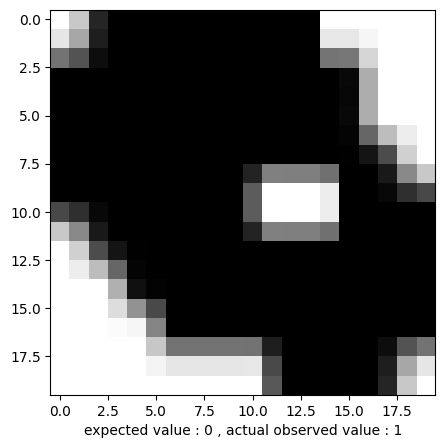

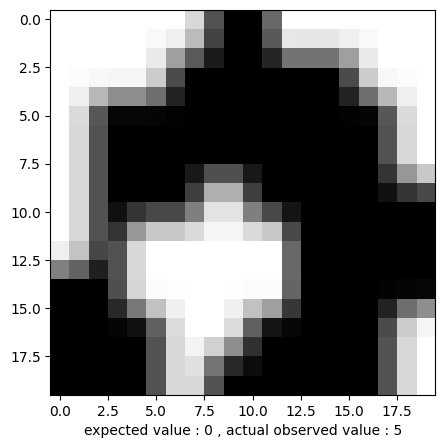

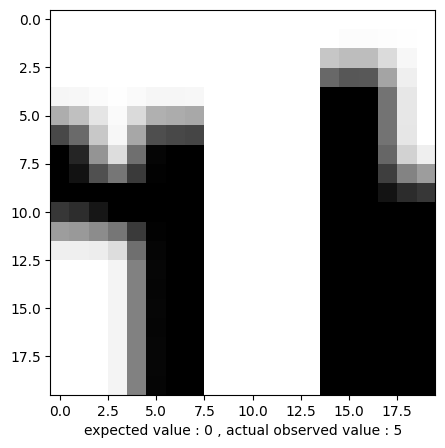

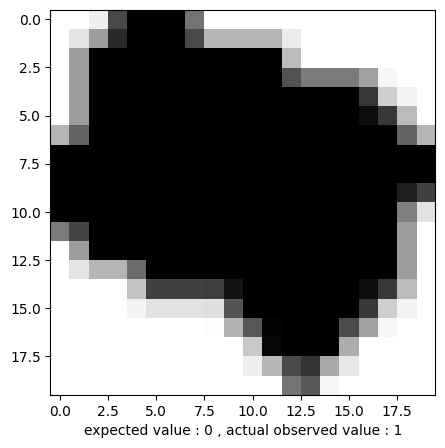

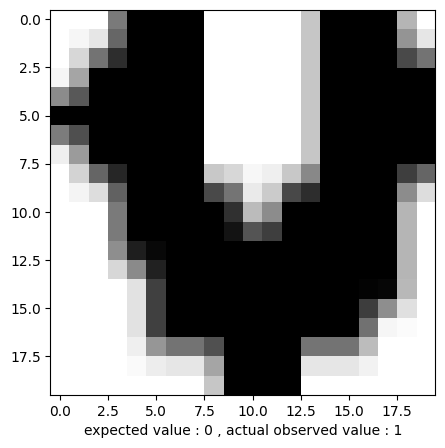

In [223]:
gnb_s.get_images_detected_wrong()

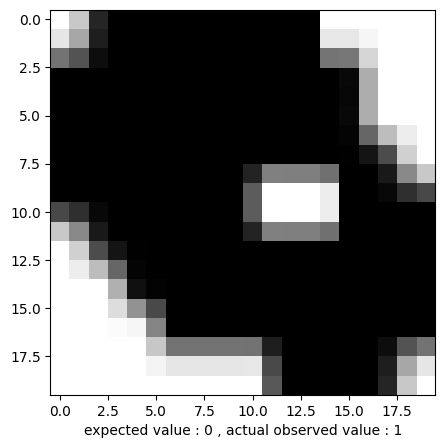

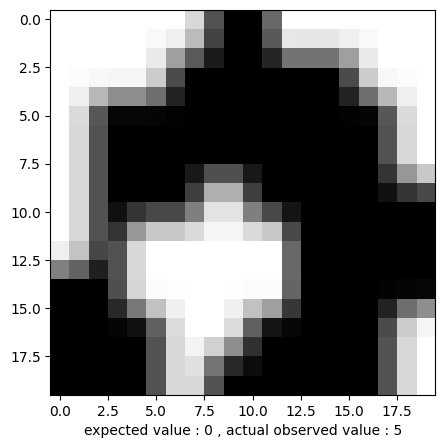

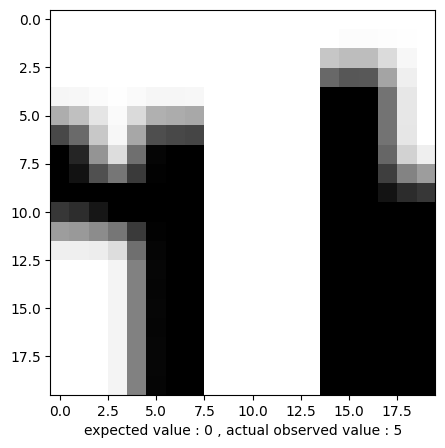

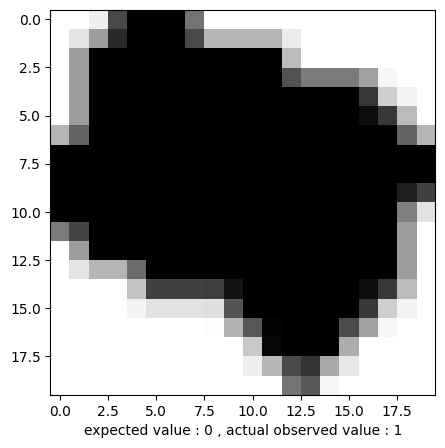

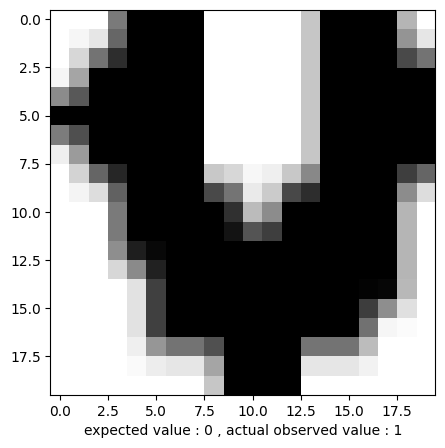

In [224]:
gnb.get_images_detected_wrong()

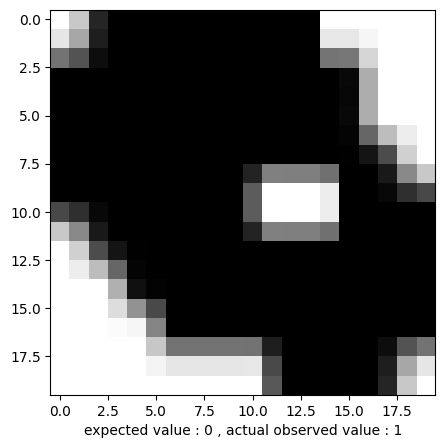

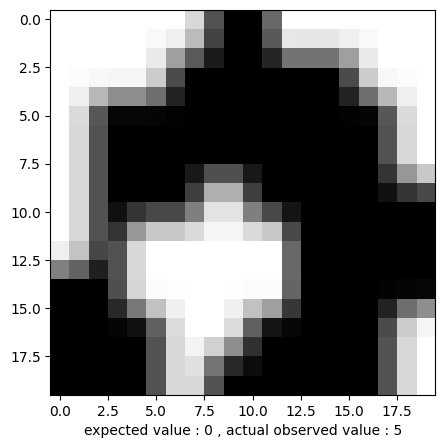

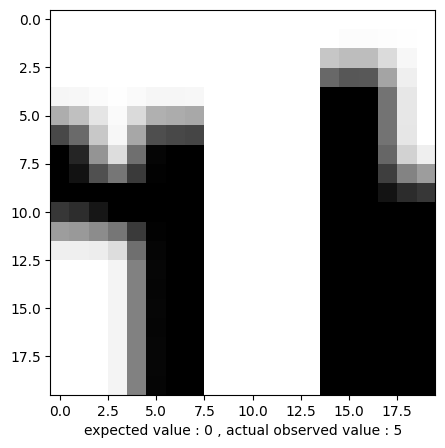

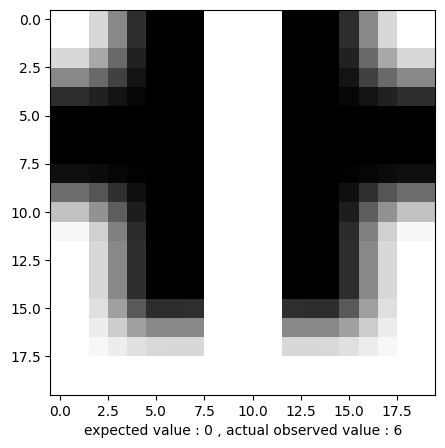

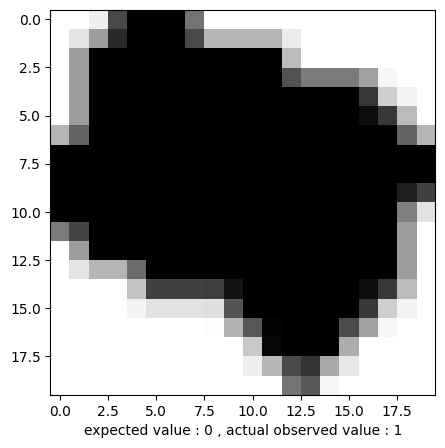

In [228]:
bnb.get_images_detected_wrong()

### sample testing   

In [229]:
img_data = data_test_sc_rs[100]
img_label = label_test[100]
detected_label = gnb_s.predict_gaussian(img_data)
print('expected : ' + str(img_label) + ", got : " + str(detected_label))

expected : 0, got : 0
